# Analyse Factorielle des Correspondances sur tableau croisé

In [3]:
library(questionr)
library("factoextra")
library("FactoMineR")

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


### Nous allons à travers ce TP réaliser une AFC sur un jeu de données contenant 12114 individus caractérisé par 2 variables nominales à savoir le niveau d'études (4 modalités) et le type de médias le plus utilisé (7 modalités).

Commençons par introduire le tableau de contingence:

In [4]:
table=matrix(c(908,869,901,619,1307,1008,1035,612,73,107,80,177,642,408,140,209,360,336,311,298,435,494,504,281),ncol=6)
rownames(table)<-c("Prim","Second","Tech","Sup")
colnames(table)<-c("Radio","Télé","QuotNat", "QuotReg", "PrMag","PrTV")
addmargins(table)

,Radio,Télé,QuotNat,QuotReg,PrMag,PrTV,Sum
Prim,908,1307,73,642,360,435,3725
Second,869,1008,107,408,336,494,3222
Tech,901,1035,80,140,311,504,2971
Sup,619,612,177,209,298,281,2196
Sum,3297,3962,437,1399,1305,1714,12114


Nous allons maintenant utiliser questionr pour la créations des tableau de profils lignes et des profils colonnes.

In [5]:
pl=lprop(table)
pl

         Radio Télé  QuotNat QuotReg PrMag PrTV  Total
Prim      24.4  35.1   2.0    17.2     9.7  11.7 100.0
Second    27.0  31.3   3.3    12.7    10.4  15.3 100.0
Tech      30.3  34.8   2.7     4.7    10.5  17.0 100.0
Sup       28.2  27.9   8.1     9.5    13.6  12.8 100.0
Ensemble  27.2  32.7   3.6    11.5    10.8  14.1 100.0

Ainsi: 
- 24.4% de ceux qui ont fait des études primaires écoutent la Radio
- 35.1% de ceux qui ont fait des études primaires regardent la télé
- 2% de ceux qui ont fait des études primaires lisent le quotidien national
- 17.2% de ceux qui ont fait des études primaires lisent le quotidien régional
- 9.7% de ceux qui ont fait des études primaires lisent la Presse Magazine
- 11.7% de ceux qui ont fait des études primaires lisent la Presse TV

In [6]:
pc=cprop(table)
pc

       Radio Télé  QuotNat QuotReg PrMag PrTV  Ensemble
Prim    27.5  33.0  16.7    45.9    27.6  25.4  30.7   
Second  26.4  25.4  24.5    29.2    25.7  28.8  26.6   
Tech    27.3  26.1  18.3    10.0    23.8  29.4  24.5   
Sup     18.8  15.4  40.5    14.9    22.8  16.4  18.1   
Total  100.0 100.0 100.0   100.0   100.0 100.0 100.0   

Ainsi:
- 27.5% de ceux qui écoutent la radio ont fait des études primaires
- 26.4% de ceux qui écoutent la radio ont fait des études secondaires
- 27.3% de ceux qui écoutent la radio ont fait des études techniques
- 18.8% de ceux qui écoutent la radio ont fait des études supérieurs

Une condition nécessaire à la pertinence de l’AFC est l'existence d'un lien statistiquement significatif entre les 2 variables qualitatives. 
Le test du χ2 va nous permettre de mesurer la significativité de la liaison entre les deux variables.

In [7]:
test<-chisq.test(table)
test


	Pearson's Chi-squared test

data:  table
X-squared = 502.46, df = 15, p-value < 2.2e-16


La p-value étant faible, on peut donc rejeter l'hypothèse d'indépendance. L'AFC est donc pertinente.

In [8]:
res.ca<-CA(table,graph=F)
summary(res.ca)


Call:
CA(X = table, graph = F) 

The chi square of independence between the two variables is equal to 502.4605 (p-value =  1.705139e-97 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3
Variance               0.026   0.014   0.001
% of var.             63.303  34.582   2.115
Cumulative % of var.  63.303  97.885 100.000

Rows
          Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
Prim    |    14.046 | -0.213 52.948  0.990 |  0.001  0.003  0.000 | -0.022
Second  |     0.809 | -0.025  0.645  0.209 | -0.003  0.012  0.002 |  0.049
Tech    |    13.101 |  0.169 26.687  0.535 | -0.157 42.073  0.461 | -0.015
Sup     |    13.522 |  0.169 19.721  0.383 |  0.214 57.912  0.614 | -0.014
           ctr   cos2  
Prim    16.300  0.010 |
Second  72.746  0.789 |
Tech     6.715  0.004 |
Sup      4.240  0.003 |

Columns
          Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
Radio   |     1.852 |  0.078  6.382  0.905 | -0.025  1.223  0.095 |  0.002
Télé   

In [9]:
eig.val <- res.ca$eig
round(res.ca$eig,5)

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.02626,63.30302,63.30302
dim 2,0.01434,34.58228,97.88530
dim 3,0.00088,2.11470,100.00000


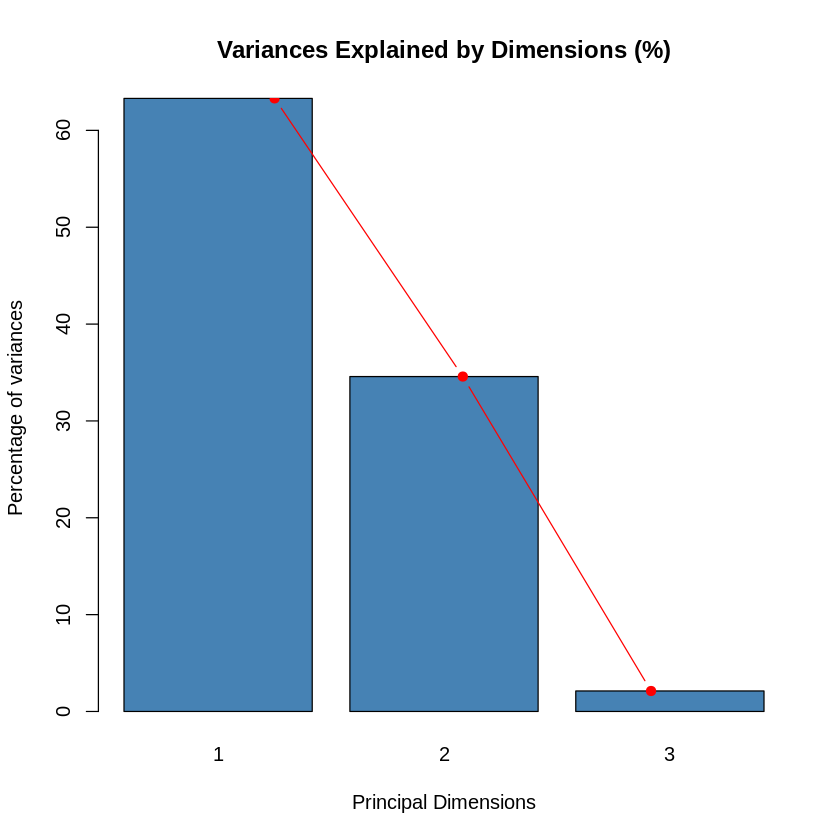

In [12]:
barplot(eig.val[, 2], 
        names.arg = 1:nrow(eig.val), 
        main = "Variances Explained by Dimensions (%)",
        xlab = "Principal Dimensions",
        ylab = "Percentage of variances",
        col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.val), eig.val[, 2], 
      type = "b", pch = 19, col = "red")

Le taux d'inertie cumulé du premier plan étant de 97.88, on va garder uniquement les 2 premiers axes.

## Carte des profils colonnes

In [13]:
round(cbind(res.ca$col$coord[,1:2],res.ca$col$contrib[,1:2], res.ca$col$cos2[,1:2]),2)

,Dim 1,Dim 2,Dim 1,Dim 2,Dim 1,Dim 2
Radio,0.08,-0.03,6.38,1.22,0.90,0.09
Télé,-0.04,-0.07,1.88,10.67,0.21,0.66
QuotNat,0.36,0.48,17.42,58.07,0.35,0.65
QuotReg,-0.39,0.13,66.00,14.46,0.89,0.11
PrMag,0.08,0.09,2.94,6.51,0.45,0.54
PrTV,0.10,-0.10,5.37,9.06,0.44,0.41


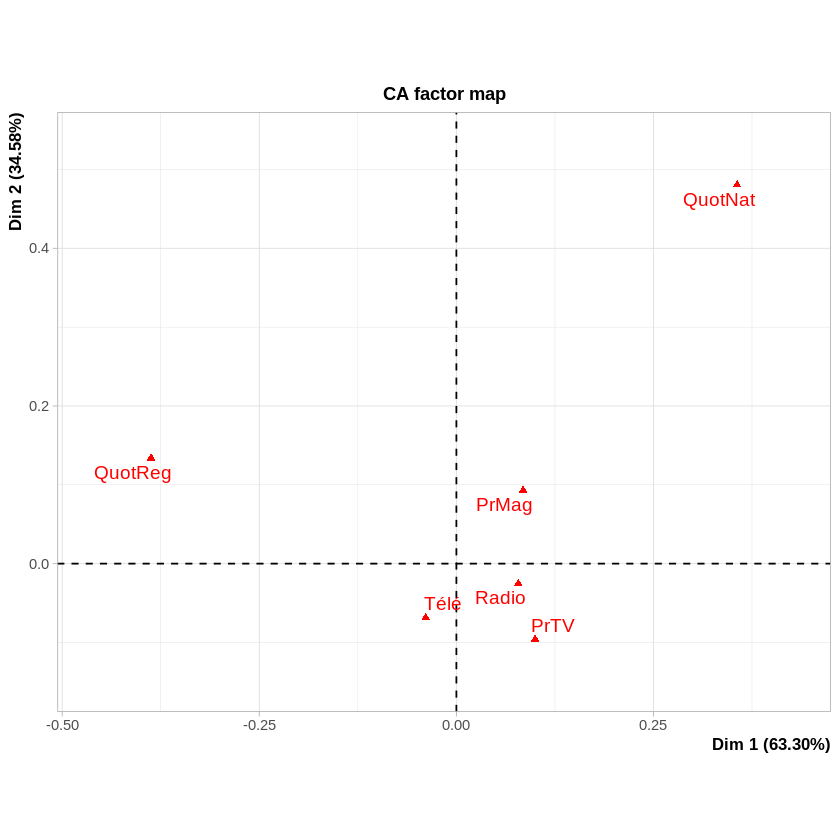

In [35]:
plot(res.ca,invisible='row')

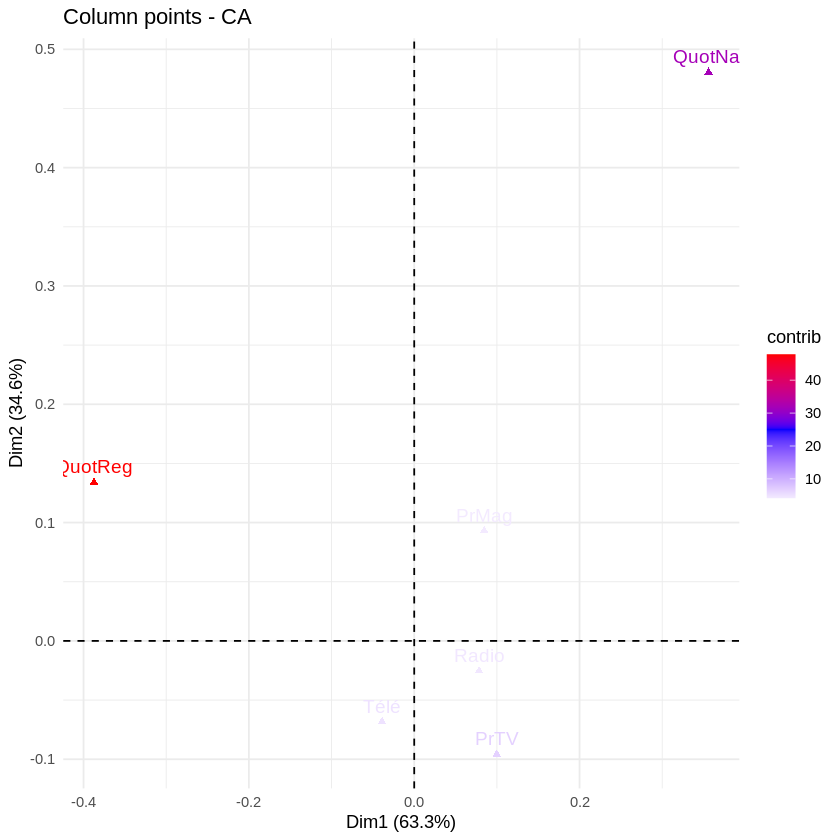

In [33]:
fviz_ca_col(res.ca, col.col = "contrib")+
 scale_color_gradient2(low = "white", mid = "blue",
           high = "red", midpoint = 25) +
 theme_minimal()

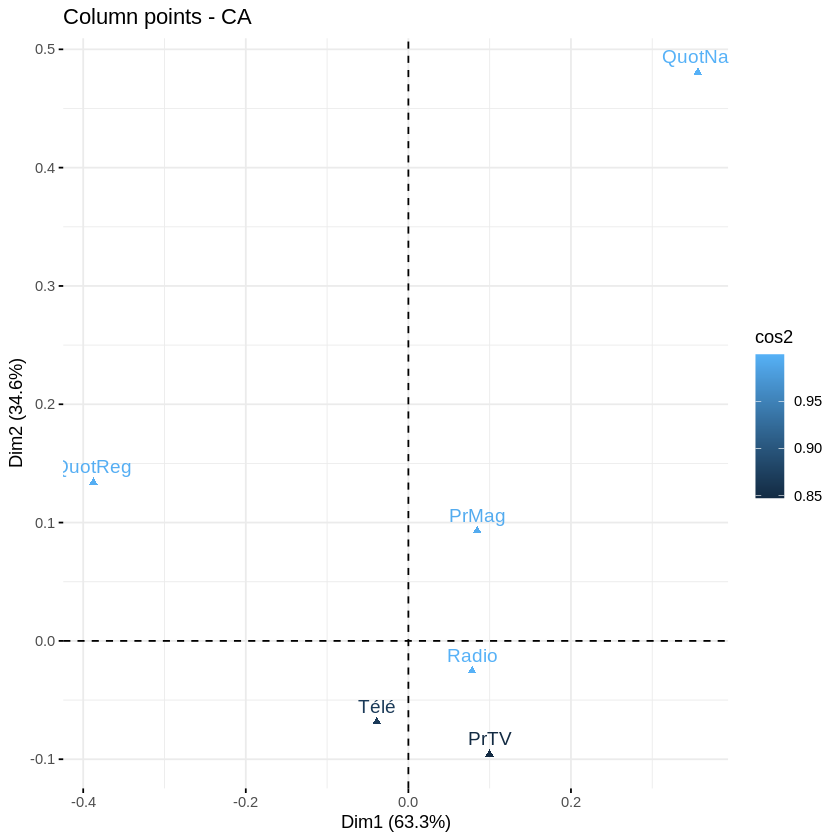

In [34]:
fviz_ca_col(res.ca, col.col="cos2")

On remarque que le premier axe oppose Quotidien Régional (Contribution de 66%) au Quotidien National (Contribution de 17.42%) ce qui veut dire que le niveau d'étude de ceux qui lisent le quotidien régional sont différents de ceux qui lisent le Quotidien National.
Le deuxième axe est expliqué par le Quotidien National et en moindre mesure par le Quotidien Régional et la Télé.
La radio bien qu'ayant une contribution faible sur le premier plan, est bien représenté sur celui-ci.

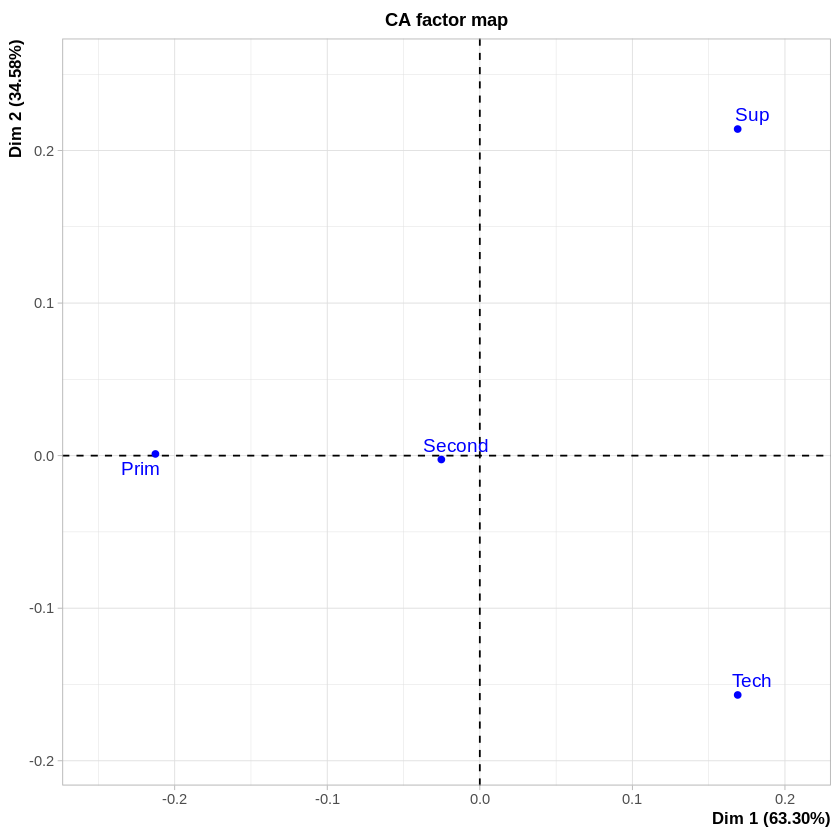

In [38]:
plot(res.ca, invisible="col")

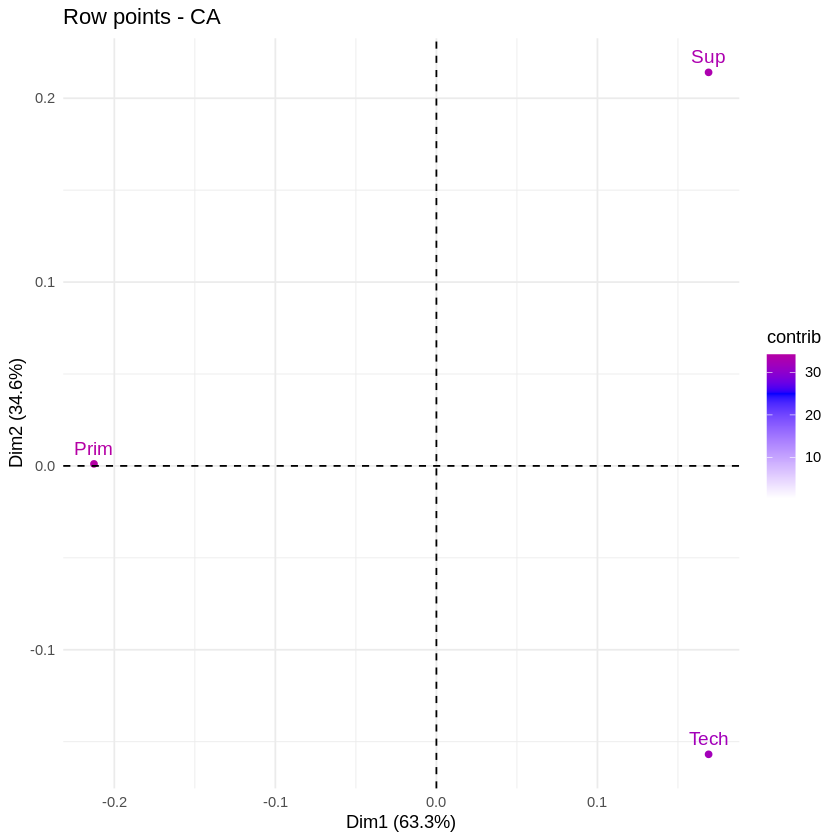

In [39]:
fviz_ca_row(res.ca, col.row = "contrib")+
 scale_color_gradient2(low = "white", mid = "blue",
           high = "red", midpoint = 25) +
 theme_minimal()

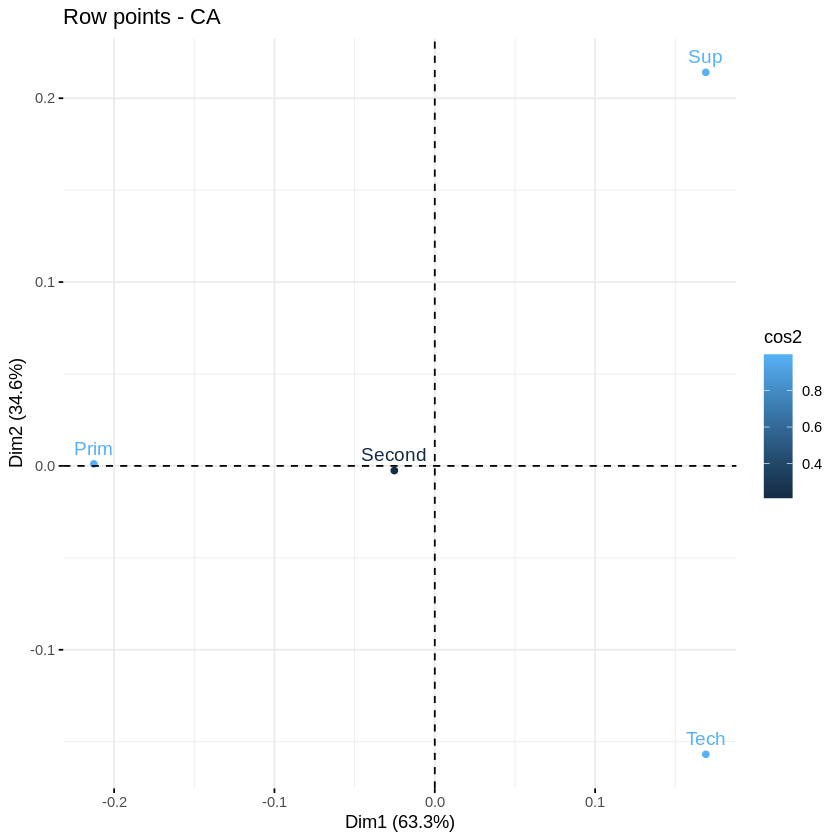

In [41]:
fviz_ca_row(res.ca, col.row="cos2")

On remarque que le premier axe oppose supérieur et technique à primaire.

Le deuxième axe oppose technique et supérieur.

On passe maintenant à une représentation simultanée.

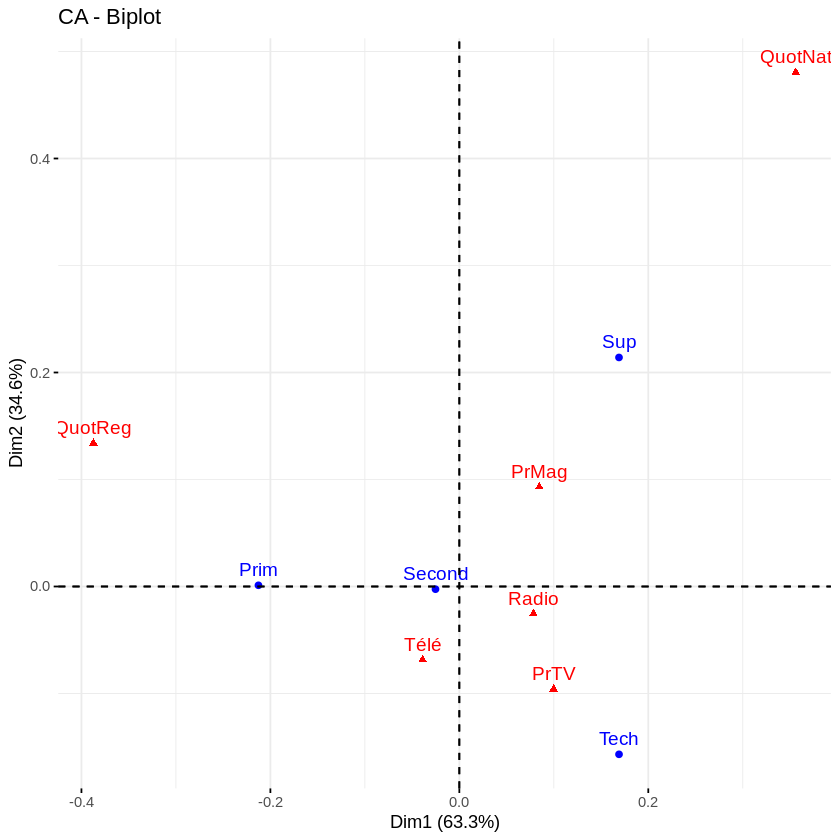

In [42]:
fviz_ca_biplot(res.ca)

Cette carte montre une correspondance entre les modalités quotidien natinale et supérieur ainsi que Quotidien regional et primaire ainsi que Presse TV et Technique.
Les modalités Radio et Télé ont une position centrale dans cette carte. Ceci est dû au fait que les personnes, tous niveaux d’études confondus, fréquentent principalement ces 2 médias comme le montre les profils-lignes : respectivement 24.4% et 35.1% pour les Primaires, 27% et 31.3% pour les Secondaires…

Le lien entre QuotNat et Supérieur n’est pas “symétrique”. En effet la modalité la plus excentré qui est Quotidien Nationnal est expliquée par Supérieur mais pas l’inverse. 

Remarque : Toutefois on devrait s’attarder sur ce 8.1% parcequ’il apporte une information intéressante malgré sa faiblesse par rapport aux % observées de la télé et de la radio. En effet, en comparant le pourcentage de personnes qui lisent les quotidiens nationaux dans les différents niveaux d’étude, on voit qu’on en a 2% chez les Primaires, 3.3% chez les Secondaires, 2.7% chez les Techniques, 8.1% chez les Supérieurs et 3.6% sur toute la population : ils sont donc beaucoup plus présents chez les supérieurs que chez les autres.